# Examples of "bundling" dimensions into groups to form the custom Binsparse levels

Custom formats: https://graphblas.org/binsparse-specification/#custom_formats

### Data of bundled groups
- `Sparse(n1)`
  - pointers array (or scalar `k` for ELLPACK-like compression) if not initial level
  - indices for `n1` dimensions
- `Dense(n2)`
  - N/A

_Note that indices grouped together in this scheme are all the same length, so they can be stored as separate 1-d arrays or a single 2-d array_

# Examples for rank 4 array

Pass COO-like data to `SparseTensor` with one array of indices for each dimension.

The default is to create CSF sparse data structure where all levels are Sparse.

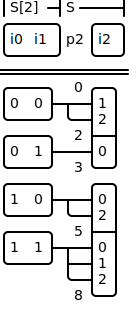

In [1]:
from sparsetensorviz import SparseTensor
import itertools
import IPython

indices = [
    [0, 0, 1, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 2, 0, 2, 0, 0, 1, 2],
]
sp = SparseTensor.from_binsparse(indices, structure="Sparse(2)-Sparse")
# Display as SVG diagram
sp

In [2]:
sp.indices

[array([0, 0, 1, 1]), array([0, 1, 0, 1]), array([1, 2, 0, 0, 2, 0, 1, 2])]

In [3]:
sp.pointers

[None, array([0, 2, 3, 5, 8])]

In [4]:
# Can also display as ASCII diagram
print(sp)

|S[2] -|S -----|
.------.   .---.
|i0 i1 |p2 |i2 |
`------'   `---'
.-----.  0 .--.
|0  0 |-+--|1 |
`-----' `--|2 |
.-----.  2 |--|
|0  1 |----|0 |
`-----'  3 `--'
.-----.    .--.
|1  0 |-+--|0 |
`-----' `--|2 |
.-----.  5 |--|
|1  1 |-+--|0 |
`-----' |--|1 |
        `--|2 |
         8 `--'


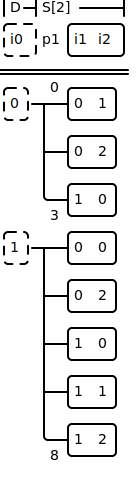

In [5]:
# Example with a dense level
SparseTensor.from_binsparse(indices, structure="Dense-S(2)")

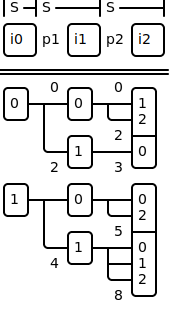

In [6]:
# The default structure is all levels Sparse(1), which is traditional compressed sparse fiber (CSF)
SparseTensor.from_binsparse(indices)

## Display all standard sparse structures

Hyphonated connecting lines indicate pointers that don't need stored.

In [7]:
def display_header(st):
    binsparse_groups = ", ".join(st.binsparse_groups)
    taco_structure = ", ".join(st.taco_structure)
    text = (
        "```\n"
        f"binsparse_groups = [{binsparse_groups}]\n\n"
        f"taco_structure   = [{taco_structure}]\n\n"
        "```"
        # f"Erik's structure = {st.structure}\n\n"
    )
    IPython.display.display(IPython.display.Markdown(text))

# `S[4]`

```
binsparse_groups = [Sparse(4)]

taco_structure   = [compressed-nonunique, singleton, singleton, singleton]

```

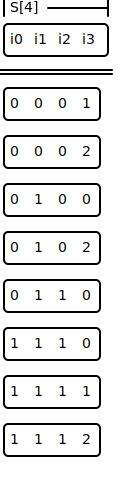

# `S[3]-S[1]`

```
binsparse_groups = [Sparse(3), Sparse(1)]

taco_structure   = [compressed, singleton, singleton, compressed]

```

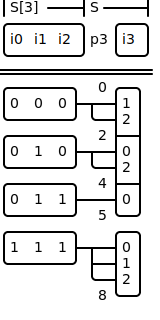

# `S[2]-S[2]`

```
binsparse_groups = [Sparse(2), Sparse(2)]

taco_structure   = [compressed, singleton, compressed-nonunique, singleton]

```

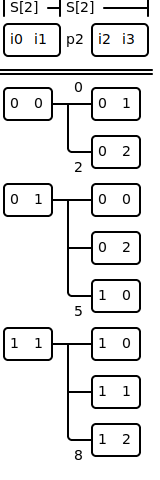

# `S[2]-D[1]-S[1]`

```
binsparse_groups = [Sparse(2), Dense(1), Sparse(1)]

taco_structure   = [compressed, singleton, dense, compressed]

```

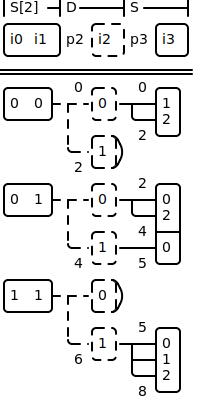

# `S[2]-S[1]-S[1]`

```
binsparse_groups = [Sparse(2), Sparse(1), Sparse(1)]

taco_structure   = [compressed, singleton, compressed, compressed]

```

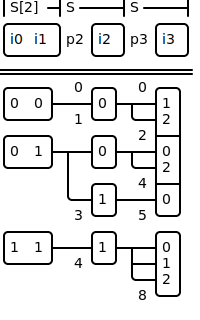

# `D[1]-S[3]`

```
binsparse_groups = [Dense(1), Sparse(3)]

taco_structure   = [dense, compressed-nonunique, singleton, singleton]

```

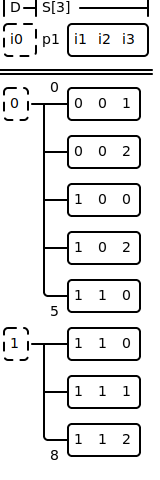

# `D[1]-S[2]-S[1]`

```
binsparse_groups = [Dense(1), Sparse(2), Sparse(1)]

taco_structure   = [dense, compressed, singleton, compressed]

```

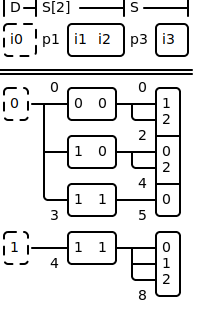

# `D[2]-S[2]`

```
binsparse_groups = [Dense(2), Sparse(2)]

taco_structure   = [dense, dense, compressed-nonunique, singleton]

```

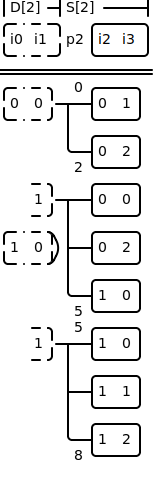

# `D[3]-S[1]`

```
binsparse_groups = [Dense(3), Sparse(1)]

taco_structure   = [dense, dense, dense, compressed]

```

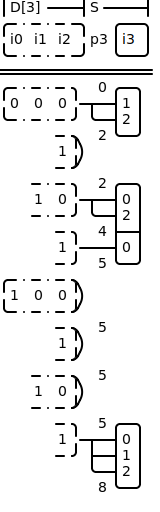

# `D[2]-S[1]-S[1]`

```
binsparse_groups = [Dense(2), Sparse(1), Sparse(1)]

taco_structure   = [dense, dense, compressed, compressed]

```

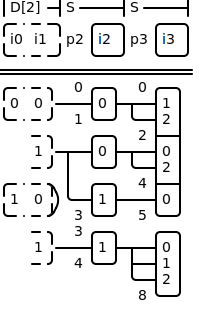

# `D[1]-S[1]-S[2]`

```
binsparse_groups = [Dense(1), Sparse(1), Sparse(2)]

taco_structure   = [dense, compressed, compressed-nonunique, singleton]

```

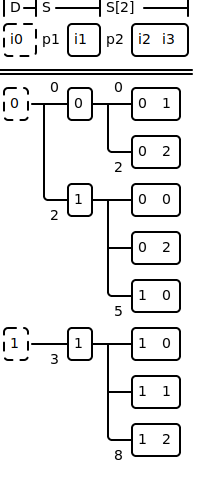

# `D[1]-S[1]-D[1]-S[1]`

```
binsparse_groups = [Dense(1), Sparse(1), Dense(1), Sparse(1)]

taco_structure   = [dense, compressed, dense, compressed]

```

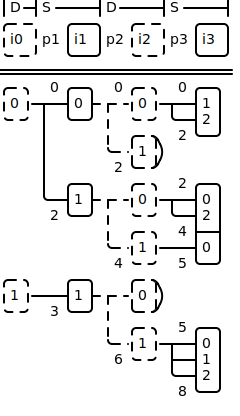

# `D[1]-S[1]-S[1]-S[1]`

```
binsparse_groups = [Dense(1), Sparse(1), Sparse(1), Sparse(1)]

taco_structure   = [dense, compressed, compressed, compressed]

```

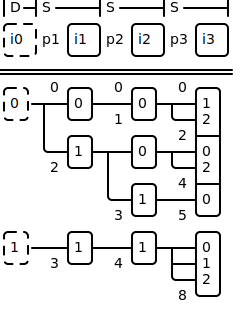

# `S[1]-S[3]`

```
binsparse_groups = [Sparse(1), Sparse(3)]

taco_structure   = [compressed, compressed-nonunique, singleton, singleton]

```

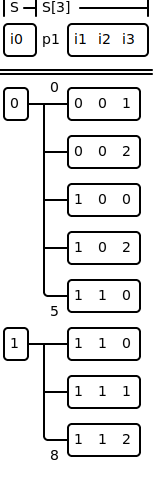

# `S[1]-S[2]-S[1]`

```
binsparse_groups = [Sparse(1), Sparse(2), Sparse(1)]

taco_structure   = [compressed, compressed, singleton, compressed]

```

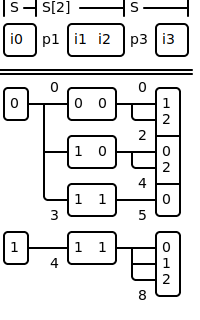

# `S[1]-D[1]-S[2]`

```
binsparse_groups = [Sparse(1), Dense(1), Sparse(2)]

taco_structure   = [compressed, dense, compressed-nonunique, singleton]

```

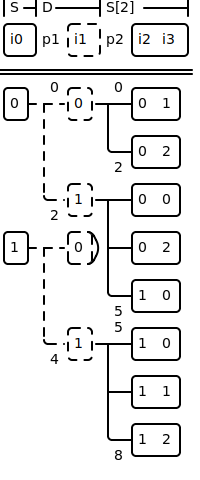

# `S[1]-D[2]-S[1]`

```
binsparse_groups = [Sparse(1), Dense(2), Sparse(1)]

taco_structure   = [compressed, dense, dense, compressed]

```

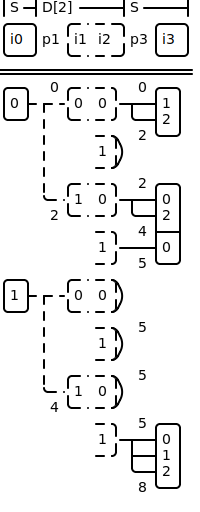

# `S[1]-D[1]-S[1]-S[1]`

```
binsparse_groups = [Sparse(1), Dense(1), Sparse(1), Sparse(1)]

taco_structure   = [compressed, dense, compressed, compressed]

```

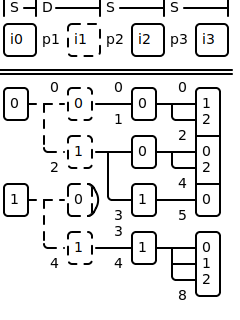

# `S[1]-S[1]-S[2]`

```
binsparse_groups = [Sparse(1), Sparse(1), Sparse(2)]

taco_structure   = [compressed, compressed, compressed-nonunique, singleton]

```

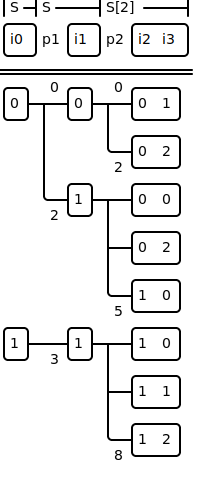

# `S[1]-S[1]-D[1]-S[1]`

```
binsparse_groups = [Sparse(1), Sparse(1), Dense(1), Sparse(1)]

taco_structure   = [compressed, compressed, dense, compressed]

```

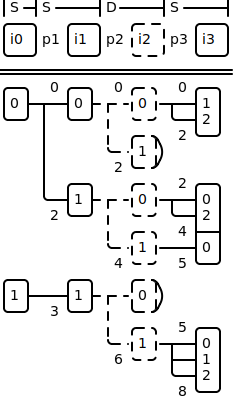

# `S[1]-S[1]-S[1]-S[1]`

```
binsparse_groups = [Sparse(1), Sparse(1), Sparse(1), Sparse(1)]

taco_structure   = [compressed, compressed, compressed, compressed]

```

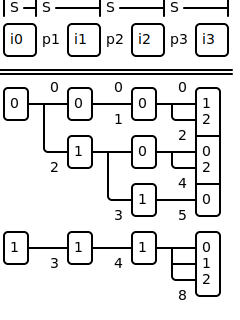

In [8]:
indices = [
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 2, 0, 2, 0, 0, 1, 2],
]
sparsities = ["S", "C", "DC"]
for sparsity in itertools.product(sparsities, sparsities, sparsities, ["S"]):
    structure = "-".join(sparsity)
    st = SparseTensor(indices, shape=(2, 2, 2, 3), structure=structure, as_binsparse=True)
    if "expanded" in " ".join(st.binsparse_groups):
        continue
    abbvs = []
    for abbv, n in st.binsparse_structure:
        abbvs.append(f"{abbv}[{n}]")
    IPython.display.display(IPython.display.Markdown(f"# `{'-'.join(abbvs)}`"))
    display_header(st)
    IPython.display.display(st)

The visualization via `sparsetensorviz` admits an "expanded sparse" level denoted by `Sparse(n, expanded=1)`.
This is a Sparse level that is followed by a Dense level and has values duplicated to expand to match the dense level.

This is not yet part of the standard binsparse formats (I think), because the regular `Sparse(n)` level without duplicates is preferred.

Similarly, I don't know if these are valid TACO formats.

# `SE[2]-D[1]-S[1]`

```
binsparse_groups = [Sparse(2, expanded=1), Dense(1), Sparse(1)]

taco_structure   = [compressed-nonunique, singleton, dense, compressed]

```

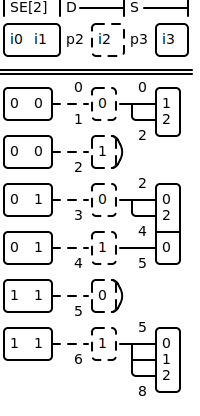

# `SE[1]-D[1]-S[2]`

```
binsparse_groups = [Sparse(1, expanded=1), Dense(1), Sparse(2)]

taco_structure   = [compressed-nonunique, dense, compressed-nonunique, singleton]

```

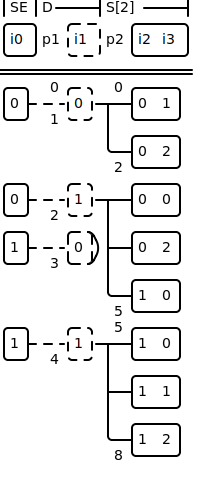

# `SE[1]-D[2]-S[1]`

```
binsparse_groups = [Sparse(1, expanded=1), Dense(2), Sparse(1)]

taco_structure   = [compressed-nonunique, dense, dense, compressed]

```

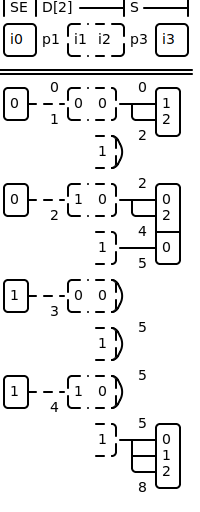

# `SE[1]-D[1]-S[1]-S[1]`

```
binsparse_groups = [Sparse(1, expanded=1), Dense(1), Sparse(1), Sparse(1)]

taco_structure   = [compressed-nonunique, dense, compressed, compressed]

```

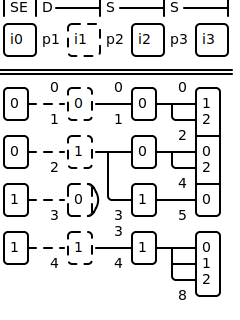

# `D[1]-SE[1]-D[1]-S[1]`

```
binsparse_groups = [Dense(1), Sparse(1, expanded=1), Dense(1), Sparse(1)]

taco_structure   = [dense, compressed-nonunique, dense, compressed]

```

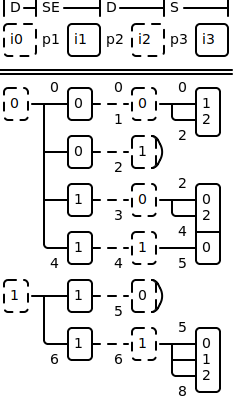

# `S[1]-SE[1]-D[1]-S[1]`

```
binsparse_groups = [Sparse(1), Sparse(1, expanded=1), Dense(1), Sparse(1)]

taco_structure   = [compressed, compressed-nonunique, dense, compressed]

```

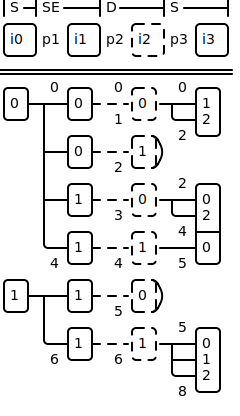

In [9]:
for sparsity in itertools.product(sparsities, sparsities, sparsities, ["S"]):
    structure = "-".join(sparsity)
    st = SparseTensor(indices, shape=(2, 2, 2, 3), structure=structure, as_binsparse=True)
    if "expanded" not in " ".join(st.binsparse_groups):
        continue
    abbvs = []
    for abbv, n in st.binsparse_structure:
        abbvs.append(f"{abbv}[{n}]")
    IPython.display.display(IPython.display.Markdown(f"# `{'-'.join(abbvs)}`"))
    display_header(st)
    IPython.display.display(st)

# voilà!